In [180]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [181]:
df = pd.read_csv('howpop_train.csv')

In [182]:
df.shape

(134137, 17)

In [183]:
df.head(4).T

,0,1,2,3
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286,18291
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus
flow,develop,design,design,design
polling,False,False,False,False
content_len,4305,7344,8431,5662
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка"
comments,0,1,47,102


In [184]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [186]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/297618/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [187]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [188]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [189]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [190]:
df.head(4).T

,0,1,2,3
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286,18291
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus
flow,develop,design,design,design
polling,False,False,False,False
content_len,4305,7344,8431,5662
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка"
comments,0,1,47,102


In [191]:
#df[['month'] + ['year']].groupby('year').sum().plot(kind='bar', rot=45);

In [192]:
#df[['month'] + ['year']].groupby('month').sum().plot(kind='bar', rot=45);

In [193]:
df[(df['year'] == 2015) & (df['month'] == 3)].head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
97666,https://habrahabr.ru/post/251783/,habrahabr.ru,251783,2015-03-01 00:00:00,@SLY_G,develop,False,49647,Введение в разработку слайд-шоу на JavaScript,6,375,42900,15.0,4.0,2015,3,7,0
97667,https://habrahabr.ru/company/kolibrios/blog/23...,habrahabr.ru,239033,2015-03-01 00:09:00,NaN,develop,False,8581,Дайджест KolibriOS #7: как мы зиму перезимовали,14,22,17600,36.0,2.0,2015,3,7,0
97668,https://habrahabr.ru/post/286286/,habrahabr.ru,286286,2015-03-01 07:13:00,@semen_grinshtein,misc,False,1883,"9 марта компания Apple сделает то, что не дела...",12,3,9300,16.0,4.0,2015,3,7,7
97669,https://habrahabr.ru/post/251347/,habrahabr.ru,251347,2015-03-01 07:52:00,@Makeman,develop,False,48658,Context Model Pattern via Aero Framework,6,66,6600,8.0,4.0,2015,3,7,7
97670,https://habrahabr.ru/post/251765/,habrahabr.ru,251765,2015-03-01 10:30:00,@Doomer3D,develop,False,40374,Заполнение текстовых шаблонов данными на основ...,4,39,6200,5.0,1.0,2015,3,7,10


In [194]:
df[(df['month'] == 3) & (df['year'] == 2015)]['domain'].value_counts()

habrahabr.ru    1434
geektimes.ru     755
Name: domain, dtype: int64

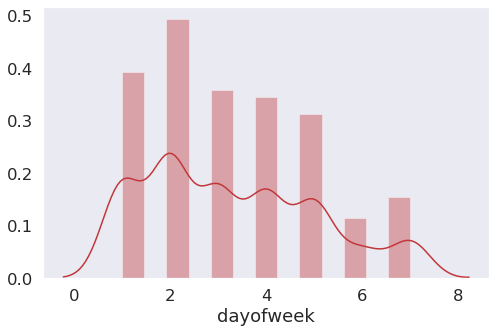

In [195]:
sns.distplot(df[(df['month'] == 3) & (df['year'] == 2015)]['dayofweek'])

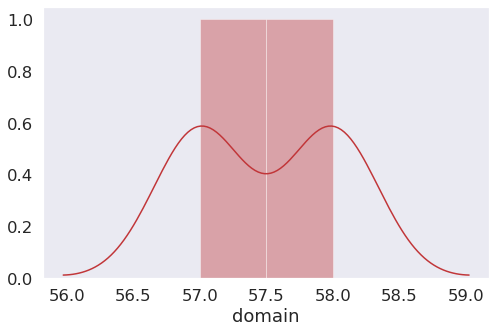

In [196]:
sns.distplot(df[(df['month'] == 3) & (df['year'] == 2015) & (df['dayofweek'] == 6) ]['domain'].value_counts())

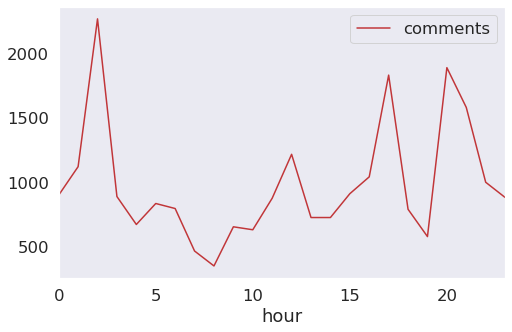

In [197]:
df[df['domain'] == 'geektimes.ru'].pivot_table(['comments'], ['hour'], aggfunc='max').plot()

In [198]:
df.columns

Index(['url', 'domain', 'post_id', 'published', 'author', 'flow', 'polling',
       'content_len', 'title', 'comments', 'favs', 'views', 'votes_plus',
       'votes_minus', 'year', 'month', 'dayofweek', 'hour'],
      dtype='object')

In [199]:
df['hour'].value_counts(ascending = False)

12    10929
13    10867
14    10462
15    10276
11     9801
16     9434
17     8653
10     7730
18     7470
19     6205
20     5258
9      4907
21     4742
22     4705
23     4683
0      4079
1      3149
8      2520
2      2272
3      1558
7      1438
4      1100
6      1048
5       851
Name: hour, dtype: int64

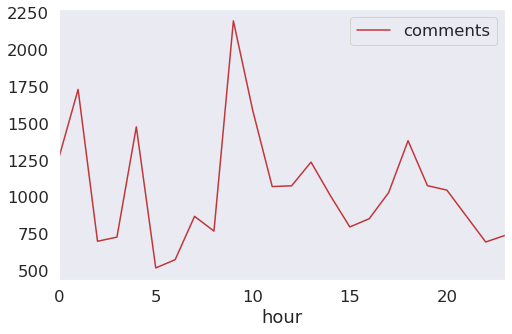

In [200]:
df[df['domain'] == 'habrahabr.ru'].pivot_table(['comments'], ['hour'], aggfunc='max').plot()

In [201]:
df['author'].value_counts().head(20).index

Index(['@alizar', '@marks', '@SLY_G', '@ivansychev', '@semen_grinshtein',
       '@jeston', '@aleksandrit', '@XaocCPS', '@Mithgol', '@Mordatyj',
       '@Shapelez', '@ilya42', '@atomlib', '@ragequit', '@Tylerskald',
       '@andorro', '@jasiejames', '@lozga', '@Sterhel', '@Jeditobe'],
      dtype='object')

In [202]:
df2 = df[df['author'].isin(df['author'].value_counts().head(20).index)]

In [221]:
pd.crosstab(df2['author'], ['votes_minus']).sort_values(by='votes_minus', 
        ascending=False)

col_0,votes_minus
author,
@alizar,5292
@marks,4711
@SLY_G,1939
@ivansychev,1350
@semen_grinshtein,1171
@jeston,1060
@aleksandrit,633
@XaocCPS,603
@Mithgol,560


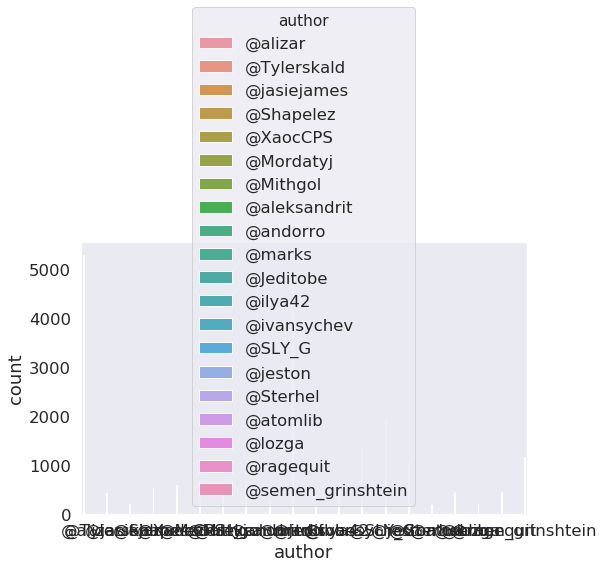

In [204]:
sns.countplot(x='author', hue='author', data=df2);

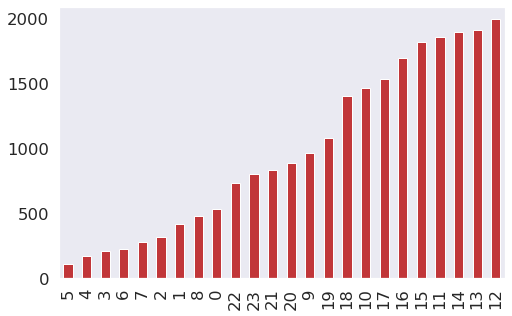

In [218]:
df[(df['dayofweek'] == 1)]['hour'].value_counts(ascending=True).plot.bar()

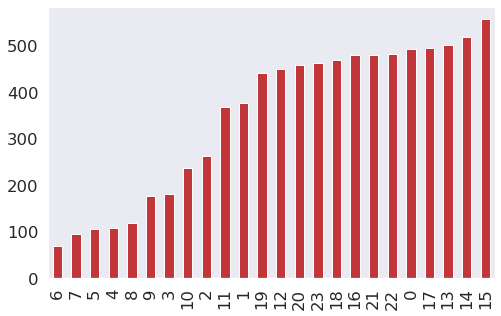

In [219]:
df[(df['dayofweek'] == 6)]['hour'].value_counts(ascending=True).plot.bar()